# AStar path finding algorithm

TODO

## Reference

+ https://www.redblobgames.com/pathfinding/a-star/introduction.html

In [1]:
import algviz

class AStarPathFinding:
    def __init__(self, row, col, blocks):
        self.viz = algviz.Visualizer(1)
        self.blocks = blocks
        self.row = row
        self.col = col
        self.grid = self.viz.createTable(row, col, cell_size=(20, 20))
        self.que = self.viz.createVector([], name='PriorityQueue', show_index=False)

    def markShortestPath(self, start, end):
        cur = end
        while cur != start:
            if cur != end:
                self.grid.mark(algviz.cTomato, cur[0], cur[1], True)
            if self.grid[cur[0]][cur[1]] == '⬇':
                cur = (cur[0] + 1, cur[1])
            elif self.grid[cur[0]][cur[1]] == '⬆':
                cur = (cur[0] - 1, cur[1])
            elif self.grid[cur[0]][cur[1]] == '➡':
                cur = (cur[0], cur[1] + 1)
            elif self.grid[cur[0]][cur[1]] == '⬅':
                cur = (cur[0], cur[1] - 1)
            else:
                break
        
    def hamiltonDistance(self, pos1, pos2):
        return abs(pos1[0]-pos2[0]) + abs(pos1[1]-pos2[1])

    def insertQueue(self, que_keys_, k, v):
        for i in range(len(que_keys_)):
            if k < que_keys_[i]:
                self.que.insert(i, v)
                que_keys_.insert(i, k)
                return
        self.que.append(v)
        que_keys_.append(k)

    def FindPath(self, start, end):
        for r in range(self.row):
            for c in range(self.col):
                self.grid[r][c] = None
        for block in self.blocks:
            self.grid.mark(algviz.cSilver, block[0], block[1], True)
        self.grid.mark(algviz.cGreen, start[0], start[1], True)
        self.grid[start[0]][start[1]] = 'E'
        self.grid.mark(algviz.cGreen, end[0], end[1], True)
        self.grid[end[0]][end[1]] = 'S'
        visit = set()
        self.que.clear(); self.que.append(start)
        que_keys = [0]
        self.viz.display()
        while len(self.que) > 0:
            cur = self.que.pop(0);que_keys.pop(0)
            if cur == end:
                break
            if cur in visit:
                continue
            self.grid[cur[0]][cur[1]]
            visit.add(cur)
            up = (cur[0]-1, cur[1])
            down = (cur[0]+1, cur[1])
            left = (cur[0], cur[1]-1)
            right = (cur[0], cur[1]+1)
            cur_dist = self.hamiltonDistance(cur, start)
            if up[0] >= 0 and up not in visit and up not in self.blocks:
                dist = cur_dist + self.hamiltonDistance(up, end)
                self.insertQueue(que_keys, dist, up)
                self.grid[up[0]][up[1]] = '⬇'
            if down[0] < self.row and down not in visit and down not in self.blocks:
                dist = cur_dist + self.hamiltonDistance(down, end)
                self.insertQueue(que_keys, dist, down)
                self.grid[down[0]][down[1]] = '⬆'
            if left[1] >=0 and left not in visit and left not in self.blocks:
                dist = cur_dist + self.hamiltonDistance(left, end)
                self.insertQueue(que_keys, dist, left)
                self.grid[left[0]][left[1]] = '➡'
            if right[1] < self.col and right not in visit and right not in self.blocks:
                dist = cur_dist + self.hamiltonDistance(right, end)
                self.insertQueue(que_keys, dist, right)
                self.grid[right[0]][right[1]] = '⬅'
            self.grid.mark(algviz.cGreenYellow, cur[0], cur[1])
            self.viz.display()
        self.markShortestPath(start, end)
        self.viz.display()

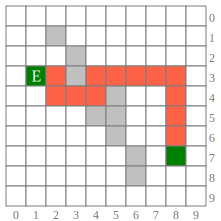

PriorityQueue:

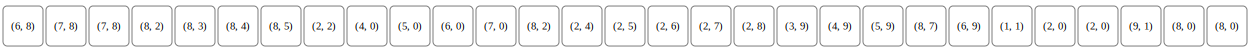

In [2]:
# Grid and blocks defination.
row, col = 10, 10
blocks = [
    (1, 2), (2, 3), (3, 3),
    (5, 4), (5, 5), (6, 5),
    (7, 6), (8, 6), (4, 5)
]
start = (3, 1)
end = (7, 8)

AStarPathFinding(row, col, blocks).FindPath(start, end)